In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data= pd.read_csv('dataset_ages.csv')[['Age']]
data

,Age
0,14
1,19
2,28
3,22
4,30
...,...
79205,59
79206,21
79207,25
79208,40


In [3]:
data2= pd.DataFrame(data.value_counts())
# a.columns= ['count']
data2= data2.rename(columns={0:'Count'})
data2= data2.sort_values(by=['Age'])
data2= data2.reset_index()
data2

,Age,Count
0,1,18
1,2,8
2,3,3
3,4,1
4,5,3
...,...,...
86,94,1
87,95,2
88,97,1
89,98,3


Akan mengelompokkan age, misal: 20-30 akan dikelompokkan

In [4]:
arr_age_group= []
size= 20
interval= 5

for i in range(0, size):
    start= (i*interval)+1
    end= (i*interval)+interval
    
    temp_list= np.linspace(start, end, interval)
    
    arr_age_group.append(temp_list)
    
arr_age_group

[array([1., 2., 3., 4., 5.]),
 array([ 6.,  7.,  8.,  9., 10.]),
 array([11., 12., 13., 14., 15.]),
 array([16., 17., 18., 19., 20.]),
 array([21., 22., 23., 24., 25.]),
 array([26., 27., 28., 29., 30.]),
 array([31., 32., 33., 34., 35.]),
 array([36., 37., 38., 39., 40.]),
 array([41., 42., 43., 44., 45.]),
 array([46., 47., 48., 49., 50.]),
 array([51., 52., 53., 54., 55.]),
 array([56., 57., 58., 59., 60.]),
 array([61., 62., 63., 64., 65.]),
 array([66., 67., 68., 69., 70.]),
 array([71., 72., 73., 74., 75.]),
 array([76., 77., 78., 79., 80.]),
 array([81., 82., 83., 84., 85.]),
 array([86., 87., 88., 89., 90.]),
 array([91., 92., 93., 94., 95.]),
 array([ 96.,  97.,  98.,  99., 100.])]

In [5]:
new_data= pd.DataFrame()

for i in arr_age_group:
    temp_df= pd.DataFrame()
    temp_int= 0
    
    for j in i: temp_int+= data2.loc[data2['Age']==j,'Count'].sum()
    
    temp_df['Age Interval']= ['{}:{}'.format(int(i[0]), int(i[-1]))]
    temp_df['Count']= [int(temp_int)]
    
    new_data= pd.concat([new_data, temp_df], axis='rows')

new_data.reset_index(drop=True, inplace=True)
new_data

,Age Interval,Count
0,1:5,33
1,6:10,4
2,11:15,861
3,16:20,6085
4,21:25,19311
5,26:30,21250
6,31:35,13618
7,36:40,8432
8,41:45,4229
9,46:50,2444


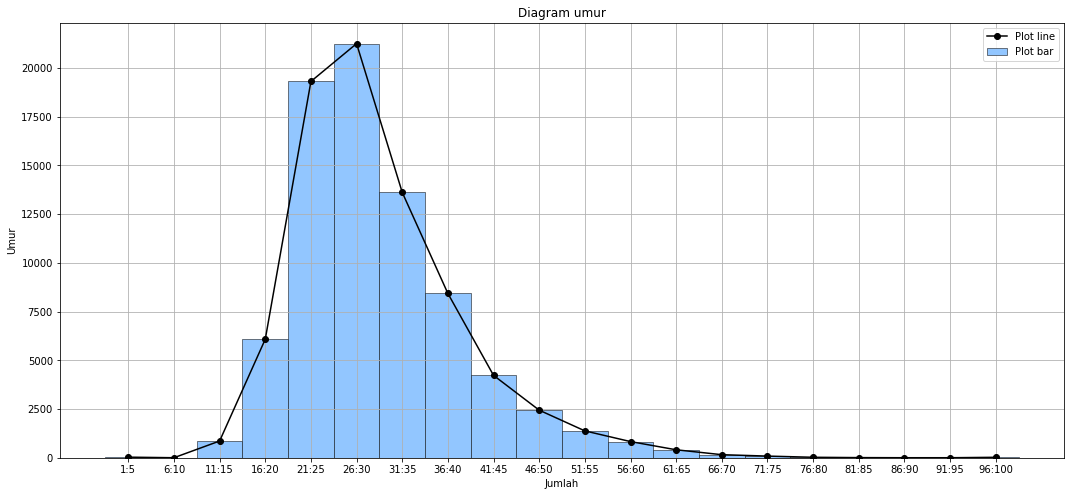

In [6]:
# plt.hist(new_data['Count'])
# plt.show()
# new_data.plot(kind='bar', xti)

plt.style.use('seaborn-pastel')

plt.figure(figsize=(18,8))
plt.bar(new_data['Age Interval'], new_data['Count'], width=1, edgecolor='black', linewidth=0.5, label='Plot bar')
# plt.hist(new_data['Count'], bins=np.linspace(10,100,10), width=1, edgecolor='black', linewidth=0.5, label='Plot bar')
plt.plot(new_data['Age Interval'], new_data['Count'], color='black', marker='o', label='Plot line')
# plt.fill_between(new_data['Age Interval'], new_data['Count'], color='#cf6955')

plt.legend()
plt.title('Diagram umur')
plt.xlabel('Jumlah')
plt.ylabel('Umur')
plt.grid()

plt.show()